In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from scipy import io
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt
np.random.seed(123) 

###Our Network without Dropout

In [18]:
dataset = io.loadmat('/content/Data_hoda_full.mat')

x_train_original = np.squeeze(dataset['Data'][0:1000])
y_train_original = np.squeeze(dataset['labels'][0:1000])
x_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test_original = np.squeeze(dataset['labels'][1000:1200])

# Resize
x_train_5by5 = [cv2.resize(img, (5, 5)) for img in x_train_original]
x_test_5by5 = [cv2.resize(img, (5, 5)) for img in x_test_original]
x_train = [x.reshape(25) for x in x_train_5by5]
x_test = [x.reshape(25) for x in x_test_5by5]

# Preprocess input data for Keras. 
x_train = np.array(x_train)
y_train = keras.utils.np_utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test)
y_test = keras.utils.np_utils.to_categorical(y_test_original, num_classes=10)

# Normalization and changing the format for Keras
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
# Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

In [22]:
# Fit model on training data and evaluate model on test data for each epoch
for i in range(200):
  model.fit(x_train, y_train, epochs=1, batch_size=128, verbose=0)

  loss, acc = model.evaluate(x_train, y_train, verbose=0)
  train_loss += [loss]
  train_accuracy += [acc]
  loss, acc = model.evaluate(x_test, y_test, verbose=0)
  test_loss += [loss]
  test_accuracy += [acc]

In [23]:
print("Test Accuracy:",test_accuracy[-1],"\nMaximum Test Acuracy During Training: ", max(test_accuracy))

Test Accuracy: 0.9200000166893005 
Maximum Test Acuracy During Training:  0.9350000023841858


### Let's plot loss and accuracy

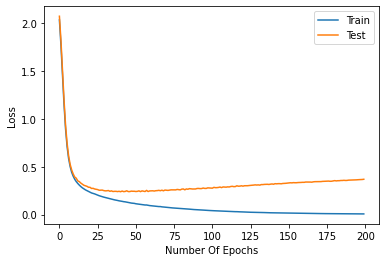

In [24]:
plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

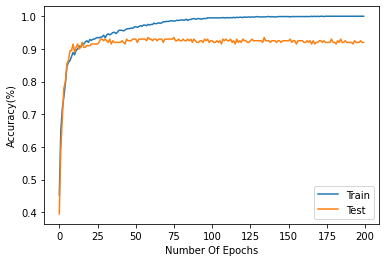

In [25]:
plt.figure(2)
plt.plot(train_accuracy, label='Train')
plt.plot(test_accuracy, label='Test')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

### Our Network with Dropout

In [26]:
# Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [27]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

In [29]:
# Fit model on training data and evaluate model on test data for each epoch
for i in range(200):
  model.fit(x_train, y_train, epochs=1, batch_size=128, verbose=0)

  loss, acc = model.evaluate(x_train, y_train, verbose=0)
  train_loss += [loss]
  train_accuracy += [acc]
  loss, acc = model.evaluate(x_test, y_test, verbose=0)
  test_loss += [loss]
  test_accuracy += [acc]

In [30]:
print("Test Accuracy:",test_accuracy[-1],"\nMaximum Test Acuracy During Training: ", max(test_accuracy))

Test Accuracy: 0.925000011920929 
Maximum Test Acuracy During Training:  0.9449999928474426


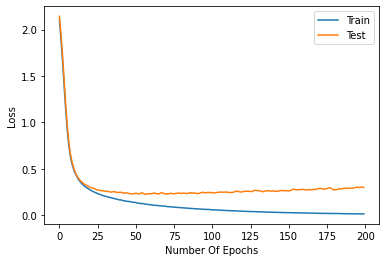

In [31]:
plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

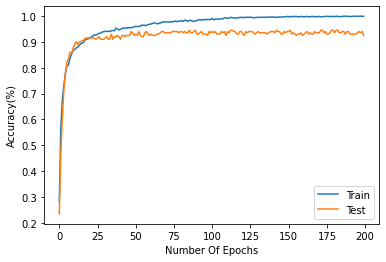

In [32]:
plt.figure(2)
plt.plot(train_accuracy, label='Train')
plt.plot(test_accuracy, label='Test')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

#### we can see that our maximum test accuracy increased 1 percent and our test accuracy increased 0.5 percent, so this dropout would work on this problem.